# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sqlite3

# Create a SQL connection to our SQLite database

In [3]:
con = sqlite3.connect('F:\Github\Exploratory Data Analysis - Amazon Customers/database.sqlite')

In [4]:
type(con)

sqlite3.Connection

### The column or features in the dataset:
* Id
* ProductId — unique identifier for the product
* UserId — unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator — number of users who found the review helpful
* HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
* Score — rating between 1 and 5
* Time — timestamp for the review
* Summary — brief summary of the review
* Text — text of the review

# Reading data from Sqlite database

In [5]:
df = pd.read_sql_query('SELECT * FROM Reviews',con)

In [6]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

In [9]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

# What is sentiment analysis?

Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
  
* Some examples of applications for sentiment analysis include:

1.Analyzing the social media discussion around a certain topic

2.Evaluating survey responses

3.Determining whether product reviews are positive or negative

***Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.***

In [10]:
!pip install TextBlob

In [11]:
from textblob import TextBlob

In [12]:
text = df['Summary'][0]
text

'Good Quality Dog Food'

In [13]:
TextBlob(text).sentiment.polarity

0.7

In [14]:
polarity = []
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
len(polarity)

568454

In [16]:
data = df.copy()

In [17]:
data['Polarity'] = polarity

In [18]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

# Lets perform EDA for the Positve sentences

In [19]:
data_positive = data[data['Polarity']>0]

In [20]:
data_positive.shape

(331665, 11)

In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud,STOPWORDS

In [23]:
stopwords = set(STOPWORDS)

In [24]:
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000

In [25]:
total_text = (' '.join(data_positive['Summary']))

In [26]:
len(total_text)

8465012

In [27]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [28]:
import re
total_text = re.sub('[^a-zA-Z]', ' ', total_text)

In [29]:
total_text[0:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [30]:
total_text =  re.sub(' +', ' ', total_text)

In [31]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

Text(0.5, 1.0, 'Positive Behaviour')

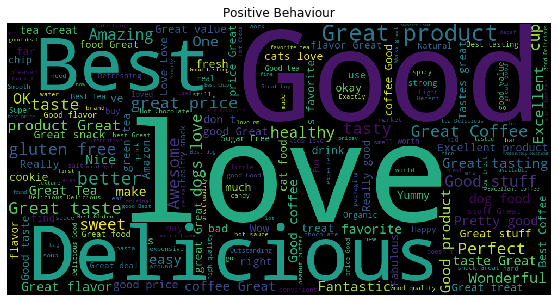

In [98]:
word_cloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Positive Behaviour')

 # Lets perform EDA for the Neagtive sentences

In [33]:
data_negative = data[data['Polarity']<0]

In [34]:
data_negative.head()

Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
16  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                     0   
26  27  B001GVISJM  A3RXAU2N8KV45G          lady21                     0   
57  58  B004N5KULM   ASCNNAJU6SXF8         S. Beck                     1   
61  62  B004N5KULM   A7ZK2A3VIW7X9           Peggy                     0   
62  63  B001EO5TPM  A1E09XGZUR78C6   gary sturrock                     2   

    HelpfulnessDenominator  Score        Time                Summary  \
16                       0      2  1348099200             poor taste   
26                       1      1  1332633600        Nasty No flavor   
57                       1      5  1336176000  How can you go wrong!   
61                       2      5  1319414400       pretty expensive   
62                       2      1  1215302400         stale product.   

                                                 Text  Polarity  
16  I love eating them and they are good for watch...    -0.400  
26  The candy is just red , No flavor . Just  plan...    -1.000  
57  It is chocolate, what can I say.  Great variet...    -0.625  
61  This bag of candy online is pretty expensive, ...    -0.125  
62  Arrived in 6 days and were so stale i could no...    -0.500

In [35]:
total_text2 = (' '.join(data_negative['Summary']))

In [36]:
len(total_text2)

1438541

In [37]:
total_text2 = re.sub('[^a-zA-Z]', ' ', total_text2)

In [38]:
total_text2 = re.sub(' +', ' ', total_text2)

Text(0.5, 1.0, 'Negative Behaviour')

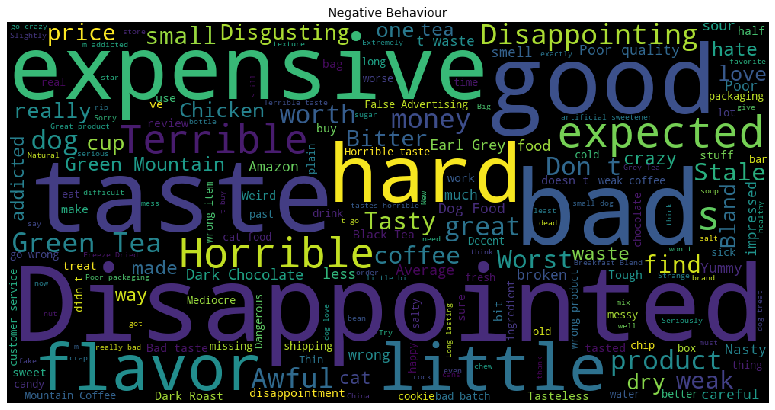

In [99]:
word_cloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,7))
plt.imshow(word_cloud2)
plt.axis('off')
plt.title('Negative Behaviour')

## Analyse to what User Amazon Can recommend more product

**Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement.**

In [40]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [41]:
df['UserId'].nunique()

256059

In [42]:
raw = df.groupby('UserId').agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='Text', ascending=False)

In [43]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [44]:
raw.columns = ['number_of_summaries', 'num_text', 'Avg_Score', 'no_of_products_purchased']
raw

number_of_summaries  num_text  Avg_Score  \
UserId                                                     
A3OXHLG6DIBRW8                  448       448   4.535714   
A1YUL9PCJR3JTY                  421       421   4.494062   
AY12DBB0U420B                   389       389   4.647815   
A281NPSIMI1C2R                  365       365   4.841096   
A1Z54EM24Y40LL                  256       256   4.453125   
...                             ...       ...        ...   
A2HROKQO0GA5AF                    1         1   3.000000   
A2HROR28DMJV2W                    1         1   5.000000   
A2HRR8CO2Y20G8                    1         1   5.000000   
A2HRSML93IK9TR                    1         1   5.000000   
AZZZOVIBXHGDR                     1         1   2.000000   

                no_of_products_purchased  
UserId                                    
A3OXHLG6DIBRW8                       448  
A1YUL9PCJR3JTY                       421  
AY12DBB0U420B                        389  
A281NPSIMI1C2R                       365  
A1Z54EM24Y40LL                       256  
...                                  ...  
A2HROKQO0GA5AF                         1  
A2HROR28DMJV2W                         1  
A2HRR8CO2Y20G8                         1  
A2HRSML93IK9TR                         1  
AZZZOVIBXHGDR                          1  

[256059 rows x 4 columns]

In [45]:
user_10 = raw.index[0:10]

In [46]:
number_10 = raw.no_of_products_purchased[0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

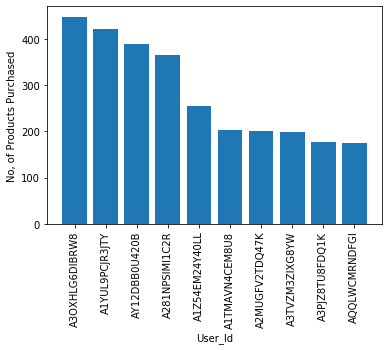

In [47]:
plt.bar(x=user_10, height=number_10, label='Most recommended users')
plt.xlabel('User_Id')
plt.ylabel('No, of Products Purchased')
plt.xticks(rotation='vertical')

***These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a high probability that these person are going to be buy more.***

**As data is so huge,so if your system takes a lot for the execution , u can considered some sample of data from entire data,
as may be some of you have not that much good specifications in terms of processor ,RAM & HArd Disk..
so according to system specifications,u can considered some sample of data,if u have not issue with your specifications,
u can go ahead with this bulky data**

In [48]:
# df.sample(n=2000)

In [49]:
final = df[0:2000]

In [50]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

**Check missing values in dataset**

In [51]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

**Removing the Duplicates if any**

In [52]:
final.duplicated().sum()

0

## Analyse Length of Comments whether Customers are going to give Lengthy comments or short one

In [53]:
len(final['Text'][0].split(' '))

49

In [54]:
def calc_len(text):
    return len(text.split(' '))

In [55]:
final['Text_length'] = final['Text'].apply(calc_len)

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
import plotly.express as px

In [57]:
px.box(final, y='Text_length')

#### Conclusion-->>

***Seems to have Almost 50 percent users are going to give their Feedback limited to 50 words whereas there are only few users who are going give Lengthy Feedbacks***

### Analyze Score

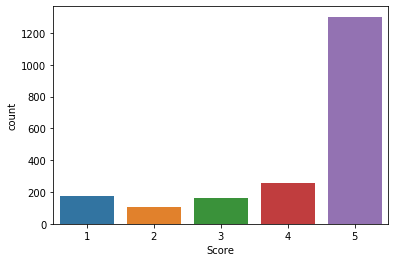

In [58]:
sns.countplot(final['Score'])

In [59]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

# Text Pre-Processsing

In [60]:
final['Text'] = final['Text'].str.lower()

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [62]:
import re
re.sub('[^a-zA-Z]',' ',final['Text'][164])

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

# Removal of Punctuations

In [63]:
punctuations='''!()-[]{};:'"\,<>./?@#$%^&*_~'''

data = final['Text'][164]
no_punc = ''
for char in data:
    if char not in punctuations:
        no_punc=no_punc + char
        
no_punc 

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [64]:
# Tring Something OR Just testing
import re
t1 = re.sub('[^a-zA-Z0-9]',' ',final['Text'][164])
re.sub(' +',' ',t1)

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor '

In [65]:
import string
punctuations = string.punctuation

def remove_punc(review):
    no_punc = ''
    for char in review:
        if char not in punctuations:
            no_punc=no_punc + char
    return no_punc 

In [66]:
final['Text'] = final['Text'].apply(remove_punc)

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price  there was a wide...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

In [68]:
data = final['Text'][164]
data

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

# Removal of Stopwords

In [69]:
import nltk
from nltk.corpus import stopwords

In [70]:
re = [word for word in data.split(' ') if word not in set(stopwords.words('english'))]

str=''
for wd in re:
    str=str+wd
    str=str+' '
str

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

## Using join to convert list into string

In [71]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [72]:
final['Text'] = final['Text'].apply(remove_stopwords)

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
final['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

# Pre-process your Data in a Depth

* Check if urls is present in Text column or not

In [75]:
final['Text'].str.contains('http?').sum()

35

In [77]:
pd.set_option('display.max_rows',2000)
final['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [80]:
review = final['Text'][21]
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

**We will observe we have some kind of URLs over here in my data that is definitely a kind of Dirtines in data, so we have to clean this data & make ready data for the analysis purpose.**

# Removal of urls

In [79]:
import re

In [83]:
url_pattern = re.compile(r'href|http.\w+')
url_pattern.sub(r'',review)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [84]:
def remove_url(reviews):
    url_pattern=re.compile(r'href|http.\w+')
    return url_pattern.sub(r'',reviews)

In [85]:
final['Text'] = final['Text'].apply(remove_url)

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
final['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [87]:
final['Text'][25]

'product received advertisedbr br  strawberry 16ounce bags pack 6a'

In [89]:
final['Text'].str.contains('http').sum()

0

***As we will see we have lots of br in my data, let me remove wherever i have br***

In [91]:
final['Text'][34].replace('br','')

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant and ive ever eaten close second noninstant variety  mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  own sugar 10count boxes pack 6'

In [92]:
for i in range(len(final['Text'])):
    final['Text'][i]=final['Text'][i].replace('br','')

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anurag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Advantages of Word Clouds :

* Analyzing customer and employee feedback.
* Identifying new SEO keywords to target.

In [93]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

# Creating WordCloud for Behaviour Analysis

In [94]:
comment_words = ' '.join(final['Text'])

In [96]:
stopwords = set(STOPWORDS)

Text(0.5, 1.0, 'After Proper Cleaning Behaviour Analysis')

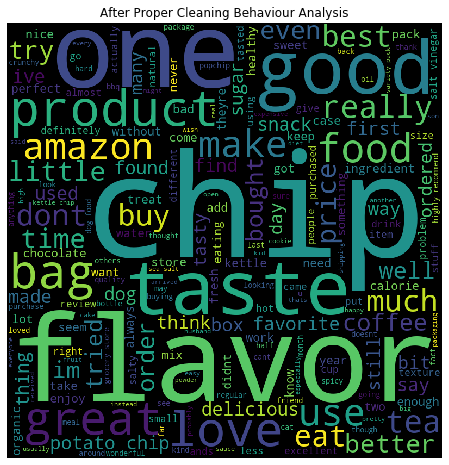

In [100]:
wordcloud = WordCloud(width=800, height=800, stopwords=stopwords).generate(comment_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('After Proper Cleaning Behaviour Analysis')

# The End!